<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P5E3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def graficar_histograma(
    datos,
    bins=50,
    color='skyblue',
    edgecolor='black',
    titulo='Histograma',
    xlabel='Valor',
    ylabel='Densidad',
    mostrar_esperanza=True,
    color_esperanza='red',
    label_esperanza='Esperanza',
    densidad=True,
    figsize=(10, 6)
):
    """
    Genera un histograma para una muestra dada con opciones configurables.

    Parámetros:
    - datos: lista o array de valores numéricos
    - bins: cantidad de intervalos (default: 50)
    - color: color de las barras
    - edgecolor: color del borde de las barras
    - titulo, xlabel, ylabel: etiquetas del gráfico
    - mostrar_esperanza: dibuja una línea vertical en la media
    - color_esperanza: color de la línea de esperanza
    - label_esperanza: etiqueta para la esperanza
    - densidad: normaliza el histograma
    - figsize: tamaño de figura (ancho, alto)
    """
    plt.figure(figsize=figsize)
    plt.hist(datos, bins=bins, color=color, edgecolor=edgecolor, density=densidad)

    if mostrar_esperanza:
        esperanza = np.mean(datos)
        plt.axvline(esperanza, color=color_esperanza, linestyle='--',
                    label=f'{label_esperanza} ≈ {esperanza:.2f}')

    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


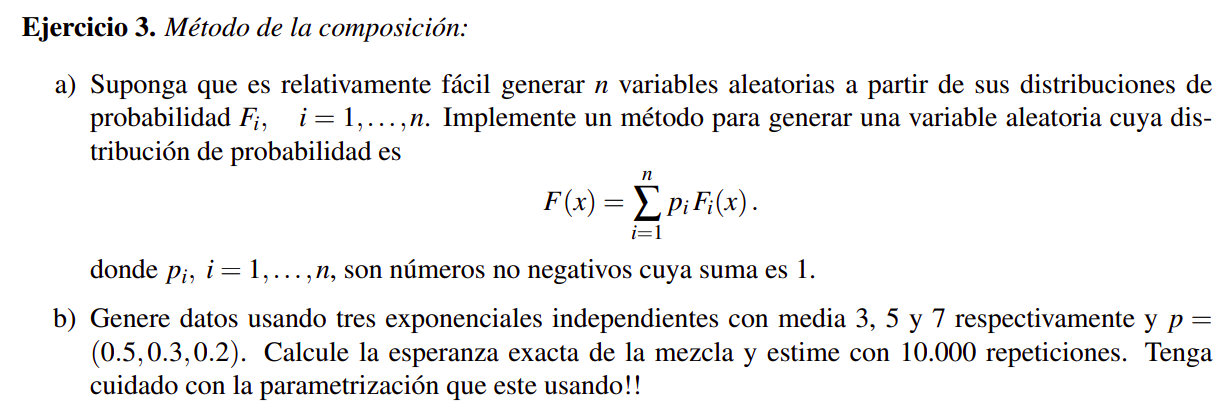

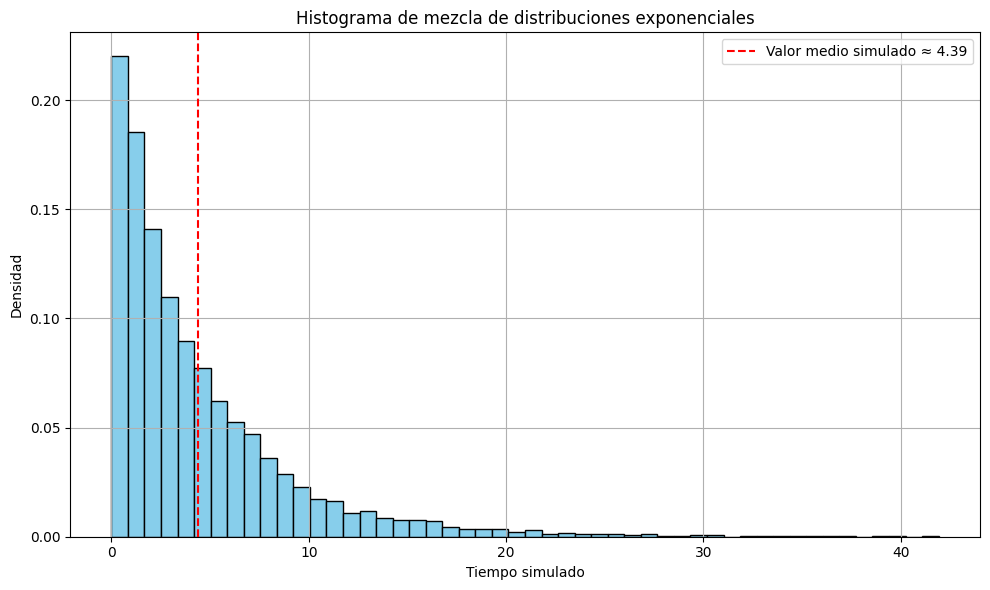

In [8]:
from random import random
import numpy as np

def generar_muestra_por_composicion(generador_peso_2uplas):
  generador_peso_2uplas = sorted(generador_peso_2uplas, key=lambda x: x[1])
  fda_v = 0
  u = random()
  for gen, peso in generador_peso_2uplas:
    fda_v += peso
    if u <= fda_v:
      return gen()

def generar_muestra_exponencial(lambd):
  u = random()
  return -np.log(1-u)/lambd

# Si X~exp(L) ==> E(X)=1/L

gen_mu3 = lambda: generar_muestra_exponencial(1/3)
gen_mu5 = lambda: generar_muestra_exponencial(1/5)
gen_mu7 = lambda: generar_muestra_exponencial(1/7)
gen_compuesto = lambda: generar_muestra_por_composicion([(gen_mu3, 0.5), (gen_mu5, 0.3), (gen_mu7, 0.2)])

muestras = [gen_compuesto() for _ in range(10_000)]
esperanza = sum(muestras)/len(muestras)

graficar_histograma(
    datos=muestras,
    titulo='Histograma de mezcla de distribuciones exponenciales',
    xlabel='Tiempo simulado',
    ylabel='Densidad',
    label_esperanza='Valor medio simulado'
)